# 机器学习实验四：朴素贝叶斯分类器
## 罗瑞 2210529

## 基本要求

(a)采用分层采样的方式将数据集划分为训练集和测试集 

(b)给定编写一个朴素贝叶斯分类器，对测试机进行预测，计算分类准确率

## 中级要求
使用测试机评估模型，得到混淆矩阵、精度、召回率、F值

## 高级要求
在中级要求的基础上画出三类数据的ROC曲线，并求出AUC值

#  **初级要求实现**

## 数据预处理

## 本题目变量的特征以及分类信息
  The attributes are (dontated by Riccardo Leardi, 
	riclea@anchem.unige.it )
 	1) Alcohol
 	2) Malic acid
 	3) Ash
	4) Alcalinity of ash  
 	5) Magnesium
	6) Total phenols
 	7) Flavanoids
 	8) Nonflavanoid phenols
 	9) Proanthocyanins
	10)Color intensity
 	11)Hue
 	12)OD280/OD315 of diluted wines
 	13)Proline            

Number of Instances

    class 1 59
	class 2 71
	class 3 48

  Number of Attributes 
	
	13

### 任务（a)读取数据并索引三类别（1，2，3）分层采样划分为训练集和测试集

In [59]:
# -*- coding: UTF-8 -*-
import math
import numpy as np  
import pandas as pd
import random

f = open('wine.data','r')
types = [[],[],[]]                      #按类分的所有数据
test_data = [[],[],[]]
train_data = [[],[],[]]
data_num = 0                            #数据总数
test_len = []                           #测试集里每一类的个数
means = [[],[],[]]                      #每一类的均值
std = [[],[],[]]                        #每一类的标准差
myline = '1'
while myline:
    myline = f.readline().split(',')
    if len(myline) != 14:
        break
    for t in range(len(myline)):
        if t == 0:
            myline[t] = int(myline[t])
        else:
            myline[t] = float(myline[t])
    temp = myline.pop(0)
    types[temp - 1].append(myline)
test_len = [round(len(types[i]) / 10) for i in range(3)]
data_num = sum([len(types[i]) for i in range(3)])

##分层抽样，训练集：测试集=９：1，在每一类别都成立，下面分类测试集和训练集
for i in range(3):
    #记录随机选取过的索引的列表
    rand = []

    while(len(rand) < test_len[i]):
        ra = random.randint(1,1000)%len(types[i])
        if ra not in rand:
            rand.append(ra)
            test_data[i].append(types[i][ra])

    for j in range (len(types[i])):
        if j not in rand:
            train_data[i].append(types[i][j])
    # print(rand)
#打印分层采样的数量结果
print(test_len)
print([len(train_data[x]) for x in range(3)])
print([len(test_data[x]) for x in range(3)])

[6, 7, 5]
[53, 64, 43]
[6, 7, 5]


### 任务(b)在训练集上进行贝叶斯分类的模型训练,对测试集进行预测并输出分类错误个数

In [64]:
#预测结果列表，用于后续数据展示
test_type= [[],[],[]]
test_pre = [[],[],[]]

#记录y_true列表和对应的预测概率便于后续
def bayes_classificate():
    # 首先，分别计算训练集上三个类的均值和标准差
    means = []
    stds = []
    
    for i in range(3):  # 对于每一个类别
        # 计算每个类别的每个属性的均值和标准差
        class_data = np.array(train_data[i])  # 将类别数据转为numpy数组，方便计算
        means.append(np.mean(class_data, axis=0))  # 计算每个属性的均值
        stds.append(np.std(class_data, axis=0))    # 计算每个属性的标准差

    #到这里，就获得了基于训练集的统计数据的贝叶斯分布
    
    wrong_num = 0
    
    #进行测试
    for i in range(3):
        for t in test_data[i]:                  #两层循环：从每一类取每一个测试样本
            my_type = []
            for j in range(3):
                #由于数据集中所有的属性都是连续值，连续值的似然估计可以按照高斯分布来计算：
                temp = 1
                for k in range(len(t)):  # 遍历每个属性
                    mean = means[j][k]
                    std = stds[j][k]
                    # 计算高斯分布概率密度
                    tem = (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-((t[k] - mean) ** 2) / (2 * std ** 2))
                    temp *= tem
                my_type.append(temp)                        #这里将所有score保存
            pre_type = my_type.index(max(my_type))          #取分值最大的为预测类别
            test_type[i].append(i)
            test_pre[i].append(pre_type)
            if pre_type != i:                               #统计错误数
                wrong_num+=1
    return wrong_num


print(bayes_classificate())

1


分类错误数为１，可见训练集的模型在测试集上几乎全部分类正确

#  **中级要求实现**

In [71]:
print(test_pre)
print(test_type)

[[0, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1, 1], [2, 2, 2, 2, 2]]
[[0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1], [2, 2, 2, 2, 2]]


In [73]:
# 根据测试集真实标签和预测标签计算其混淆矩阵
def compute_confusion_matrix(test_true, test_pred):
    # 获取类别数
    num_classes = len(test_true)
    conf_matrix = np.zeros((num_classes, num_classes), dtype=int)
    # print( test_pred)
    # 填充混淆矩阵
    for true_label, predictions in enumerate(test_pred):
        for pred_label in predictions:
            conf_matrix[true_label, pred_label] += 1
    # print(conf_matrix)
    return conf_matrix

# 根据混淆矩阵计算每个类别的精度、召回率和 F1 值
def compute_metrics(conf_matrix):
    
    num_classes = conf_matrix.shape[0]
    precision = []
    recall = []
    f1_scores = []
    total_correct = 0
    total_samples = np.sum(conf_matrix)

    for i in range(num_classes):
        tp = conf_matrix[i, i]
        fp = np.sum(conf_matrix[:, i]) - tp
        fn = np.sum(conf_matrix[i, :]) - tp
        tn = total_samples - (tp + fp + fn)
        
        # 精度计算
        precision_i = tp / (tp + fp) if (tp + fp) > 0 else 0
        precision.append(precision_i)
        
        # 召回率计算
        recall_i = tp / (tp + fn) if (tp + fn) > 0 else 0
        recall.append(recall_i)
        
        # F1 值计算
        f1_i = 2 * precision_i * recall_i / (precision_i + recall_i) if (precision_i + recall_i) > 0 else 0
        f1_scores.append(f1_i)
        
        # 记录正确预测的样本数
        total_correct += tp

    # 宏平均
    macro_precision = np.mean(precision)
    macro_recall = np.mean(recall)
    macro_f1 = np.mean(f1_scores)

    # 准确率计算
    accuracy = total_correct / total_samples

    return macro_precision, macro_recall, macro_f1, accuracy


# 计算混淆矩阵
conf_matrix = compute_confusion_matrix(test_type,test_pre )
print("混淆矩阵:\n", conf_matrix)

# 计算精度、召回率、F 值和准确率
precision, recall, f1, accuracy = compute_metrics(conf_matrix)

print(f"精度 (Precision): {precision}")
print(f"召回率 (Recall): {recall}")
print(f"F值 (F1 Score): {f1}")
print(f"准确率 (Accuracy): {accuracy}")



混淆矩阵:
 [[5 1 0]
 [0 7 0]
 [0 0 5]]
精度 (Precision): 0.9583333333333334
召回率 (Recall): 0.9444444444444445
F值 (F1 Score): 0.9474747474747475
准确率 (Accuracy): 0.9444444444444444


# **高级要求实现**

在中级要求的基础上画出三类数据的ROC曲线，并求出AUC值

类别1的AUC为0.986111111111111
类别2的AUC为0.9220779220779222
类别3的AUC为1.0


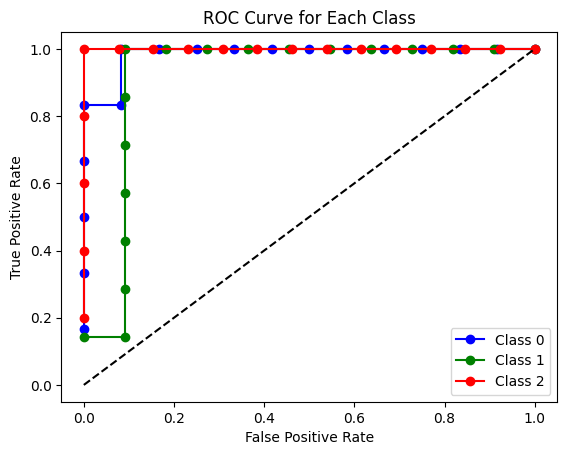

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# 假设 test_pre 是一个二维数组，行表示真实类别，列表示模型预测的类别
test_pre = [[0, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1, 1], [2, 2, 2, 2, 2]]
test_type = [0] * 6 + [1] * 7 + [2] * 5  # 展开后的真实标签

# 将 test_pre 转换为 1 维数组
pred_labels = [label for row in test_pre for label in row]

# 定义类别数
num_classes = 3
colors = ['b', 'g', 'r']
plt.figure()

# 对每个类别计算 ROC 曲线
for class_label in range(num_classes):
    # 将当前类别视为正类，其他类别为负类
    binary_true = [1 if label == class_label else 0 for label in test_type]
    binary_pred = [1 if label == class_label else 0 for label in pred_labels]
    
    # 按预测值排序
    sorted_indices = np.argsort(binary_pred)[::-1]
    sorted_true = [binary_true[i] for i in sorted_indices]

    # 正类和负类的总数
    m_pos = sum(binary_true)
    m_neg = len(binary_true) - m_pos

    # 初始化计数器
    TP = 0  # 真正例数
    FP = 0  # 假正例数
    TPR = []  # 真正例率
    FPR = []  # 假正例率

    # 遍历排序后的标签以调整阈值
    for i in range(len(sorted_true)):
        if sorted_true[i] == 1:
            TP += 1  # 正例被正确分类
        else:
            FP += 1  # 负例被错误分类
        
        # 计算当前 TPR 和 FPR
        TPR.append(TP / m_pos)
        FPR.append(FP / m_neg)

     # 使用梯形法则计算 AUC
    auc = np.trapz(TPR, FPR) 
    print(f"类别{class_label+1}的AUC为{auc}")
    # 绘制当前类别的 ROC 曲线
    plt.plot(FPR, TPR, marker='o', color=colors[class_label], label=f"Class {class_label}")

# 添加对角线
plt.plot([0, 1], [0, 1], 'k--')  # 对角线
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Each Class")
plt.legend(loc="best")
plt.show()

plt.show()


整体上看，这些 AUC 值表明模型在三个类别上的表现都很出色，特别是类别 3。分类性能依次为类别 3 > 类别 1 > 类别 2，但差异不大。

这个计算方式参考了https://blog.csdn.net/qq_46020653/article/details/119613712的方法